In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from itertools import combinations, product
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from itertools import combinations

In [3]:
# Import Dataset
df = pd.read_csv('archive/Mall_Customers.csv', usecols = lambda x: x != 'CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# Define spending categories based on score thresholds
def categorize_spending(score):
    if score < 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

In [5]:
# Apply the categorization function to create a new column 'Spending Category'
df['Spending Category'] = df['Spending Score (1-100)'].apply(categorize_spending)

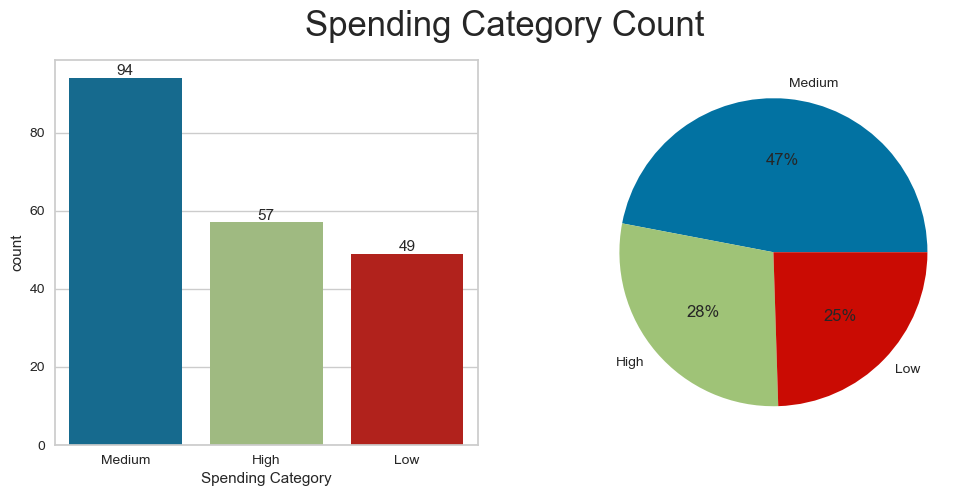

In [6]:
# Gender Count based on Spending Category
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x='Spending Category', ax=axes[0])
for rect in axes[0].patches:
    axes[0].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), 
                 ha='center', fontsize=11)
    
plt.subplot(1, 2, 2)
plt.pie(df['Spending Category'].value_counts(), labels=df['Spending Category'].value_counts().index, autopct='%.0f%%')
fig.suptitle('Spending Category Count', fontsize=25)
plt.show()

In [7]:
# Replace 'Gender' column with numeric values (0 for males, 1 for females)
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Assuming 'numerical_features' is a list of column names with numerical data
numerical_features = ['Gender', 'Age', 'Annual Income (k$)']

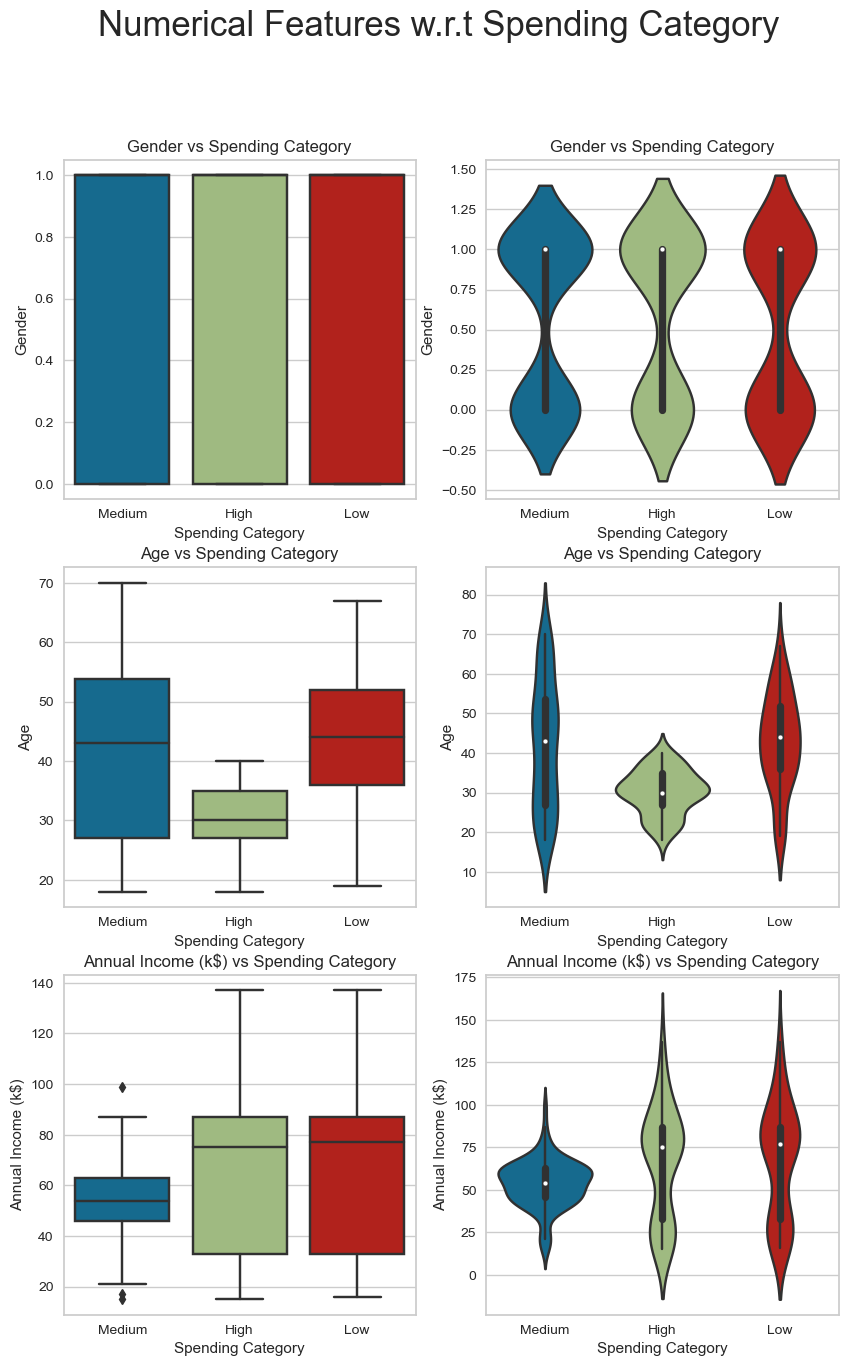

In [8]:
# Boxplot and Violinplot for Numerical Features vs Spending Category
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i, j in enumerate(numerical_features):
    sns.boxplot(x='Spending Category', y=j, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'{j} vs Spending Category')

    sns.violinplot(x='Spending Category', y=j, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{j} vs Spending Category')

fig.suptitle('Numerical Features w.r.t Spending Category', fontsize=25)
plt.show()

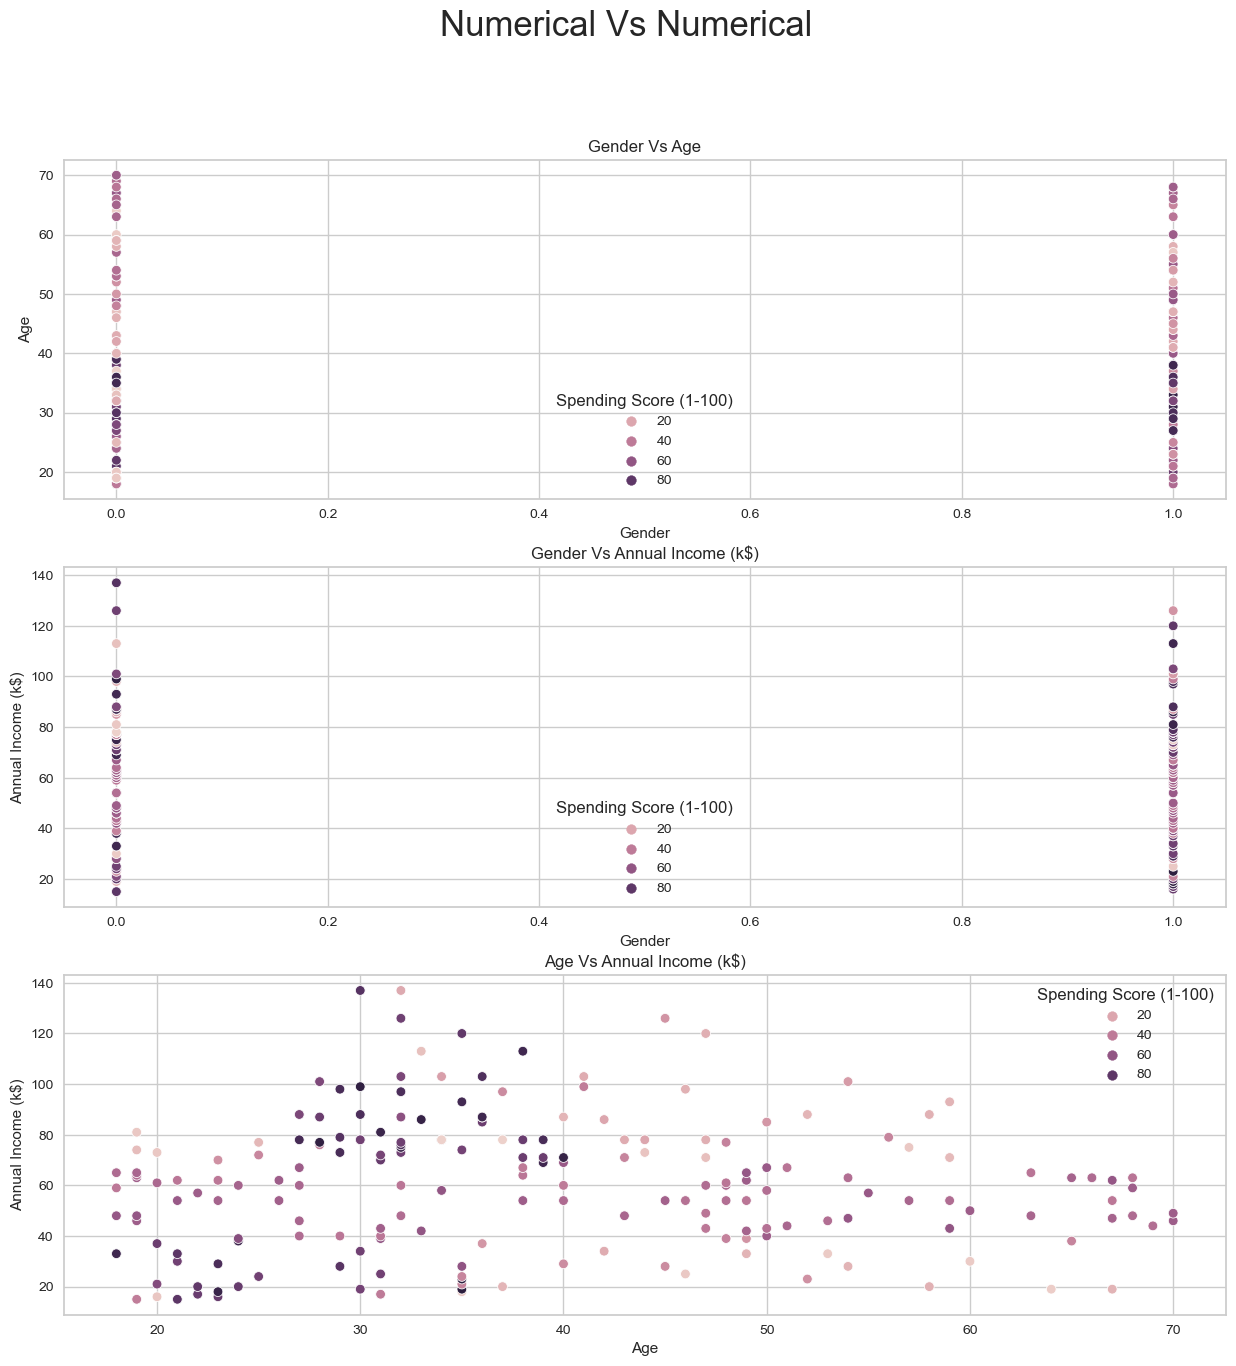

In [14]:
from itertools import combinations

comb = list(combinations(numerical_features, 2))

fig, axes = plt.subplots(3, 1, figsize = (15, 15))
for i, c in enumerate(comb):
    sns.scatterplot(data = df, x = c[0], y = c[1], hue = 'Spending Score (1-100)', ax = axes[i])
    axes[i].set_title(f"{c[0]} Vs {c[1]}")
fig.suptitle('Numerical Vs Numerical', fontsize = 25)
plt.show()


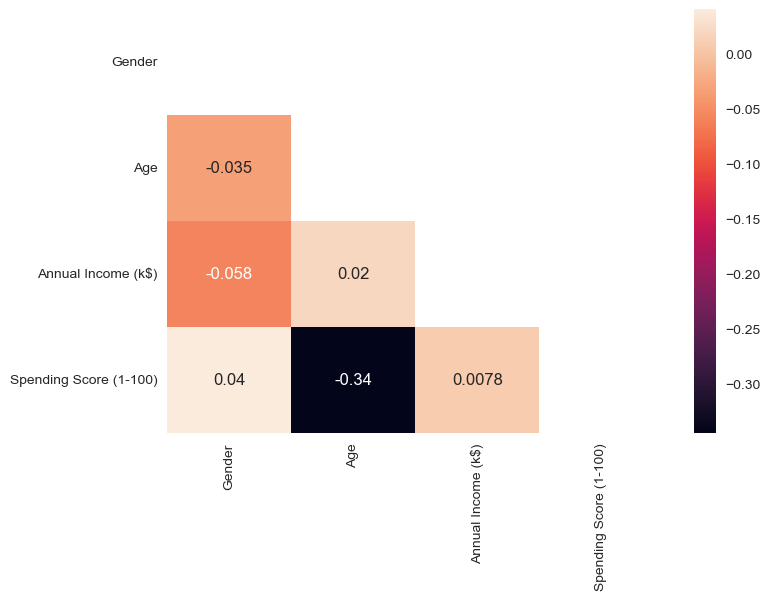

In [9]:
# Correlation Matrix
ut = np.triu(df.corr())
sns.heatmap(df.corr(method = 'spearman'), annot = True, mask = ut)
plt.show()

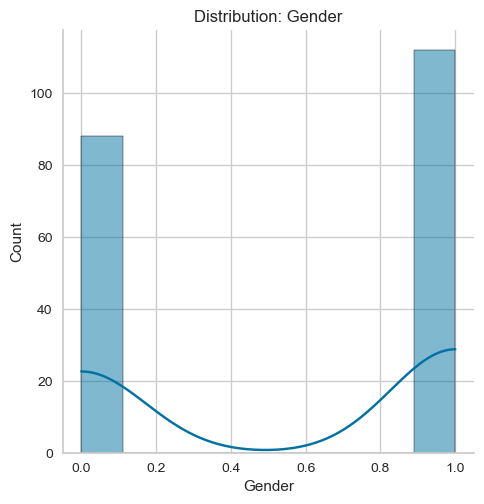

In [10]:
# Distribution plot for 'Gender' using displot (figure-level)
sns.displot(df['Gender'], kde=True)
plt.title('Distribution: Gender')
plt.show()

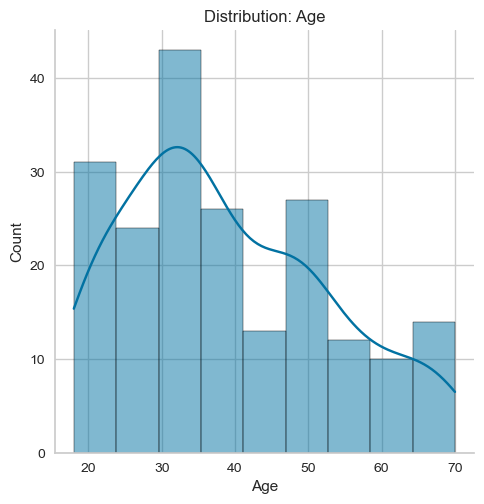

In [11]:
# Distribution plot for 'Age' using displot (figure-level)
sns.displot(df['Age'], kde=True)
plt.title('Distribution: Age')
plt.show()

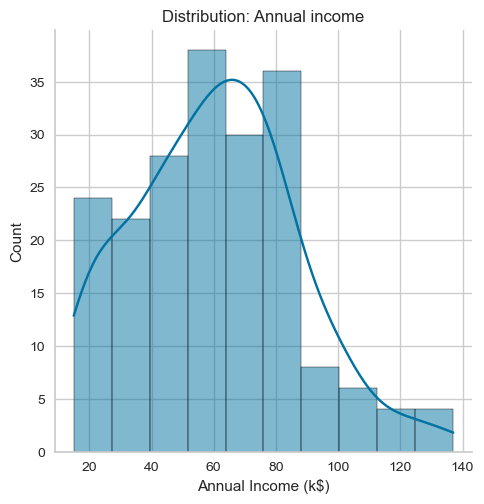

In [12]:
# Distribution plot for 'Annual Income (k$)' using displot (figure-level)
sns.displot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution: Annual income')
plt.show()

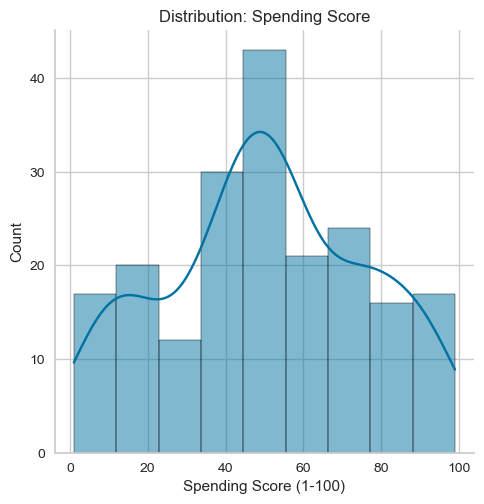

In [13]:
# Distribution plot for 'Spending Score' using displot (figure-level)
sns.displot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution: Spending Score')
plt.show()